<a href="https://colab.research.google.com/github/paulohenriquegf/portifolio_DS/blob/master/Desafio_Final_Bootcamp_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafio Final realizado no Bootcamp Analista de Machine Learning do Instituto de Gestão e Tecnologia da Informação**

**Enunciado:**

Para todo engenheiro de Machine Learning é fundamental que todos os sete passos para
construção de uma solução sejam seguidos. Nesse sentido, saber percorrer todas essas
etapas e, ao final, identificar a melhor estratégia, é papel primordial para esse profissional.
Neste desafio final vamos empregar boa parte dos conceitos mostrados no decorrer de
todos os módulos do bootcamp para a análise e classificação de veículos, do conhecido
dataset “cars”. Esse dataset contém um conjunto de informações sobre vários veículos
pesquisados. Existem dados, por exemplo, sobre a potência do veículo, sobre a origem e
cilindradas cúbicas.

Para essa análise vamos empregar os conceitos de redução da dimensionalidade com o
PCA, clusterização com o K-Means e classificações com algoritmos supervisionados.

Importando as bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression


Importando o dataset que será utilizado

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data Science/IGTI Bootcamp/Modulo 5 - Desafio Final/cars.csv')

Conferindo as 5 primeiras linhas 

In [ ]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


Conferindo o tamanho do dataset, possui 261 linhas e 8 colunas

In [ ]:
df.shape

(261, 8)

Maiores informações do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


1 - ***Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar:***

*Resposta: Não foram encontrados valores nulos após a leitura dos dados.*

Conferindo se existe algum valor faltante

In [ ]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

2 - **Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro errors='coerce'. Após essa transformação é CORRETO afirmar:**

*Resposta: Essa transformação adiciona valores nulos ao nosso dataset.*

Transformando a coluna 'cubicinches' e 'weightlbs' em númericas

In [ ]:
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')

Após a conversão, agora existem valores nulos

In [ ]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

3 - **Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.**

*Resposta: 40 e 180*

In [ ]:
np.where(df['cubicinches'].isnull())

(array([ 40, 180]),)

4 - **Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?**

*Resposta: 5*

In [ ]:
df.isnull().sum().sum()

5

5 - **Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?**

*Resposta: 3009,83. *

Preenchendo valores nulos com a média das respectivas colunas

In [ ]:
df['cubicinches'].fillna(df['cubicinches'].mean(), inplace = True)
df['weightlbs'].fillna(df['weightlbs'].mean(), inplace = True)

Verificando a média da coluna 'weightlbs'

In [ ]:
df['weightlbs'].mean()

3009.8333333333335

Verificando se ainda existe algum valor faltante

In [ ]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

6 - **Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?**

*Resposta:  22,0*

In [ ]:
df_int = df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]

In [ ]:
df_int.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


7 - **Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?**

*Resposta: 75% dos dados são maiores que o valor de 14,00*

8 - **Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar, EXCETO:**

*Resposta: Mesmo não sendo igual a 1, é possível dizer que à medida que a variável “cylinders” aumenta, a variável “mpg” também aumenta em uma mesma direção.*

Conferindo as correlações das colunas

In [ ]:
df.corr(method='pearson')

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
mpg,1.000000,-0.776710,-0.802379,-0.774905,-0.823800,0.509070,0.550441
cylinders,-0.776710,1.000000,0.951246,0.845155,0.894447,-0.578161,-0.322239
cubicinches,-0.802379,0.951246,1.000000,0.906413,0.925288,-0.610679,-0.349743
hp,-0.774905,0.845155,0.906413,1.000000,0.857125,-0.744873,-0.383869
weightlbs,-0.823800,0.894447,0.925288,0.857125,1.000000,-0.477240,-0.278683
time-to-60,0.509070,-0.578161,-0.610679,-0.744873,-0.477240,1.000000,0.312311
year,0.550441,-0.322239,-0.349743,-0.383869,-0.278683,0.312311,1.000000


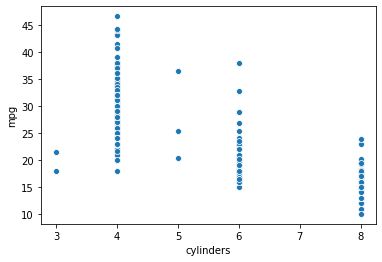

In [ ]:
sns.scatterplot(y='mpg', x='cylinders', data=df)

9 - **Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:**

*Resposta: Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro.*

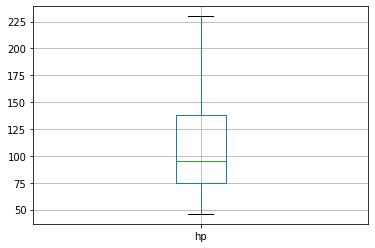

In [ ]:
df.boxplot('hp')

10 - **Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”?**

*Resposta: 3.05*

In [ ]:
normaliza = StandardScaler()
df_scaled = normaliza.fit_transform(df_int)


In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df_int.columns)

In [ ]:
df_scaled.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025


In [ ]:
df_scaled.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,3.143505e-16,2.124737e-16,-1.203805e-16,9.831429e-17,-1.648320e-16,-2.043916e-16,-2.605329e-15
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00
min,-1.683385e+00,-1.497144e+00,-1.223609e+00,-1.493239e+00,-1.648240e+00,-2.598203e+00,-1.602966e+00
25%,-7.997404e-01,-9.191048e-01,-9.198217e-01,-7.758132e-01,-8.918710e-01,-5.328295e-01,-7.766842e-01
50%,-1.466117e-01,2.369740e-01,-4.135093e-01,-2.810368e-01,-1.248816e-01,1.556284e-01,4.959804e-02
75%,7.242265e-01,1.393053e+00,9.305202e-01,7.827325e-01,7.719060e-01,4.998573e-01,8.758803e-01
max,3.003774e+00,1.393053e+00,2.338990e+00,3.058704e+00,2.344824e+00,3.253689e+00,1.702163e+00


11 - **Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada pela primeira componente principal?**

*Resposta: 72%*


In [ ]:
pca = PCA(n_components=7)
df_pca = pca.fit_transform(df_scaled)

In [ ]:
print(pca.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]


12 - **Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar:**

*Resposta: Todos os clusters possuem a mesma quantidade de elementos*

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[-2.21903474e-01,  3.35880334e-01,  2.83961966e-01,
        -2.67686215e-01, -5.45225710e-02, -4.15058549e-03,
         6.49104031e-03],
       [-2.21966813e+00, -1.65114484e-01, -1.97903173e-01,
         1.41526756e-01,  5.21847434e-02, -6.14922939e-03,
        -2.61748230e-02],
       [ 3.08082252e+00, -1.98389792e-01, -9.38631667e-02,
         1.45525382e-01,  5.33778892e-05,  1.28250676e-02,
         2.52789802e-02]])

In [ ]:
distance = kmeans.fit_transform(df_pca)

Abaixo o gráfico nos mostra a distância para cada cluster

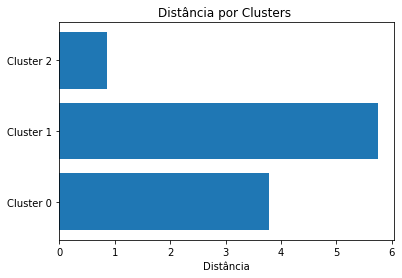

In [ ]:
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

In [ ]:
kmeans.labels_

array([2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0,
       1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2,
       0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0],
      dtype=int32)

13 - **Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas ['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada. Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?**

*Resposta: Aproximadamente 0,87.* 

In [ ]:
df_scaled['eficiencia'] = np.where(df['mpg'] > 25, 1 , 0)

In [ ]:
X = df_scaled[['cylinders','cubicinches','hp','weightlbs','time-to-60']]
y = df_scaled['eficiencia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [ ]:

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train,y_train)
predict = model_dt.predict(X_test)

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



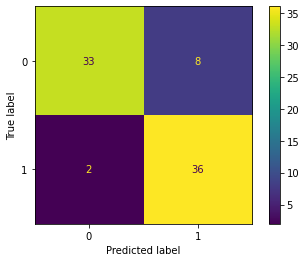

In [ ]:
plot_confusion_matrix(model_dt, X_test, y_test)

14 - **Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:**

*Resposta: Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes.*

15 - **Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho. Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar:**

*Resposta: A regressão logística não deveria ser aplicada ao problema, pois ela trabalha apenas com dados categóricos.*

In [ ]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train,y_train)
predict = model_lr.predict(X_test)

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.86      0.84      0.85        38

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79



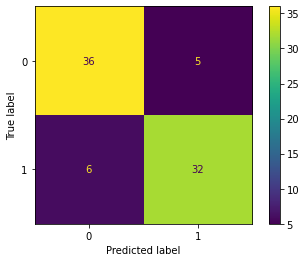

In [ ]:
plot_confusion_matrix(model_lr, X_test, y_test)